In [33]:
import kagglehub
import shutil
import os

# Download the dataset from KaggleHub
source_path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

# Define target directory
raw_dir = os.path.join("data", "raw")

# Create target directory if it doesn't exist
os.makedirs(raw_dir, exist_ok=True)

# Loop through items in the source directory
for item in os.listdir(source_path):
    source_item = os.path.join(source_path, item)
    target_item = os.path.join(raw_dir, item)
    
    if os.path.isdir(source_item):
        # Copy directory (and overwrite if exists)
        if os.path.exists(target_item):
            shutil.rmtree(target_item)
        shutil.copytree(source_item, target_item)
    else:
        # Copy file
        shutil.copy2(source_item, target_item)

print(f"✅ All dataset contents copied to: {raw_dir}")
print("Files in raw_dir:", os.listdir(raw_dir))



✅ All dataset contents copied to: data\raw
Files in raw_dir: ['StudentPerformanceFactors.csv']


In [34]:
# Step 1: load dataset and show basic info
from pathlib import Path
import pandas as pd

raw_path = Path("data") / "raw" / "StudentPerformanceFactors.csv"
print("CSV path:", raw_path)
print("Exists?:", raw_path.exists())

df = pd.read_csv(raw_path)

# quick checks
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())

# show first 10 rows
display(df.head(10))


CSV path: data\raw\StudentPerformanceFactors.csv
Exists?: True

Shape: (6607, 20)

Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [35]:
# Step 2: data types & missing values
print("Data types:\n", df.dtypes, "\n")

# missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0], "\n")

# duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Data types:
 Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object 

Missing values:
 Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64 

Duplicate rows: 0


In [36]:
# Step 3: Handle missing values
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values after filling:\n", df.isnull().sum().sum())


✅ Missing values after filling:
 0


C:\Users\Mohamed Yasser\AppData\Local\Temp\ipykernel_13868\1237854646.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [37]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# One-hot encode
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)


Original shape: (6607, 20)
Encoded shape: (6607, 28)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (5285, 27)
Testing set shape: (1322, 27)


In [47]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"data\raw\StudentPerformanceFactors.csv")

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate correlations with target
correlations = df_encoded.corr()['Exam_Score'].sort_values(ascending=False)

# Show top 5 features (excluding target)
top_features = correlations.drop('Exam_Score').head(5)
print("Top 5 correlated features:\n", top_features)

# Select only these features + target
df_selected = df_encoded[list(top_features.index) + ['Exam_Score']]
print("\nShape after feature selection:", df_selected.shape)


Top 5 correlated features:
 Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Parental_Education_Level_Postgraduate    0.093764
Name: Exam_Score, dtype: float64

Shape after feature selection: (6607, 6)


R² Score: 0.6452038230058685
MAE: 1.2540209559137612
MSE: 5.01506967497517


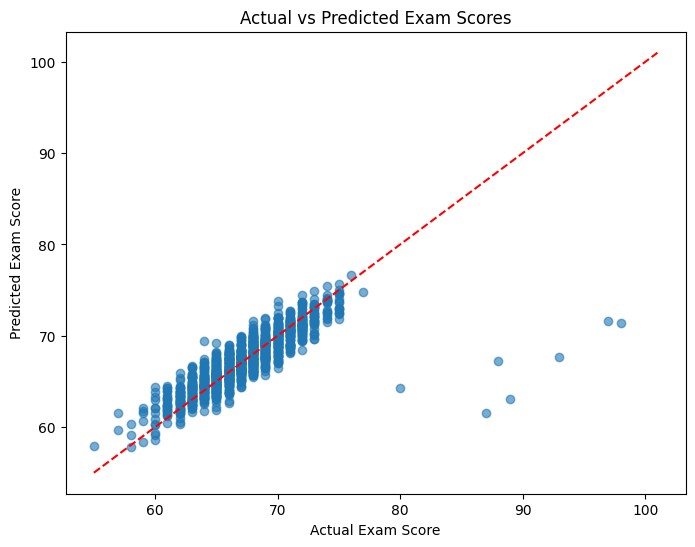

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Features & target
X = df_selected.drop('Exam_Score', axis=1)
y = df_selected['Exam_Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()
